In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns
from sklearn.model_selection import GridSearchCV
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv').drop(['Trip_ID'], axis = 1)
test = pd.read_csv('test.csv').drop(['Trip_ID'], axis = 1)

#check data type - 
## Check if the values are present
# Check the distribution
# fill in the missing values - mean
# check the correlation
# Gonna Use Accuracy as the evaluation metric

In [3]:
print train.dtypes

Trip_Distance                  float64
Type_of_Cab                     object
Customer_Since_Months          float64
Life_Style_Index               float64
Confidence_Life_Style_Index     object
Destination_Type                object
Customer_Rating                float64
Cancellation_Last_1Month         int64
Var1                           float64
Var2                             int64
Var3                             int64
Gender                          object
Surge_Pricing_Type               int64
dtype: object


In [4]:
train.describe()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Surge_Pricing_Type
count,131662.000000,125742.000000,111469.000000,131662.000000,131662.000000,60632.000000,131662.000000,131662.000000,131662.000000
mean,44.200909,6.016661,2.802064,2.849458,0.782838,64.202698,51.202800,75.099019,2.155747
std,25.522882,3.626887,0.225796,0.980675,1.037559,21.820447,4.986142,11.578278,0.738164
min,0.310000,0.000000,1.596380,0.001250,0.000000,30.000000,40.000000,52.000000,1.000000
25%,24.580000,3.000000,2.654730,2.152500,0.000000,46.000000,48.000000,67.000000,2.000000
50%,38.200000,6.000000,2.798050,2.895000,0.000000,61.000000,50.000000,74.000000,2.000000
75%,60.730000,10.000000,2.946780,3.582500,1.000000,80.000000,54.000000,82.000000,3.000000
max,109.230000,10.000000,4.875110,5.000000,8.000000,210.000000,124.000000,206.000000,3.000000


In [5]:
for col in train.columns:
    print col, train[col].isnull().sum()

Trip_Distance 0
Type_of_Cab 20210
Customer_Since_Months 5920
Life_Style_Index 20193
Confidence_Life_Style_Index 20193
Destination_Type 0
Customer_Rating 0
Cancellation_Last_1Month 0
Var1 71030
Var2 0
Var3 0
Gender 0
Surge_Pricing_Type 0


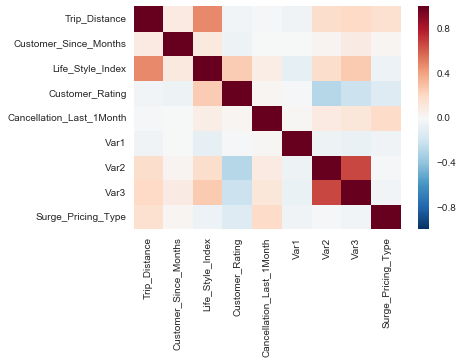

In [6]:
temp = train.dropna()
sns.heatmap(temp.corr())

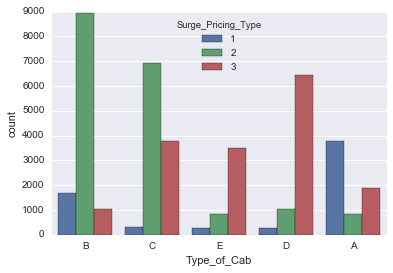

In [19]:
sns.countplot(x = 'Type_of_Cab', hue = 'Surge_Pricing_Type',  data = temp)

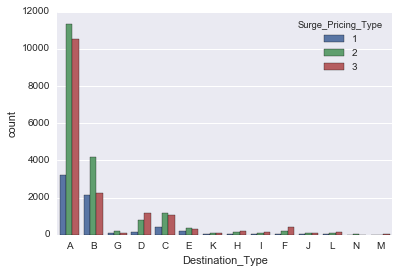

In [20]:
sns.countplot(x = 'Destination_Type', hue = 'Surge_Pricing_Type',  data = temp)

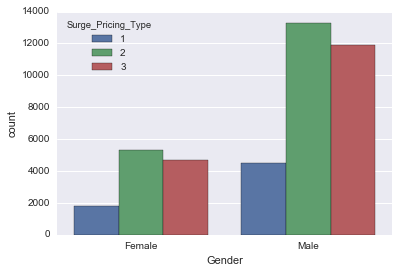

In [18]:
sns.countplot(x = 'Gender', hue = 'Surge_Pricing_Type',  data = temp)

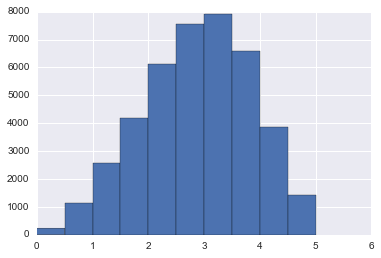

In [23]:
temp.Customer_Rating.hist()

In [28]:
temp.select_dtypes(include=[np.float64, np.int64]).columns

Index([u'Trip_Distance', u'Customer_Since_Months', u'Life_Style_Index',
       u'Customer_Rating', u'Cancellation_Last_1Month', u'Var1', u'Var2',
       u'Var3', u'Surge_Pricing_Type'],
      dtype='object')

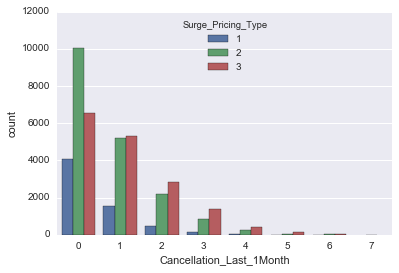

In [32]:
sns.countplot(x = 'Cancellation_Last_1Month', hue = 'Surge_Pricing_Type',  data = temp)